<a href="https://colab.research.google.com/github/AlexisL321/Group18_CS539/blob/main/Group18_CS539_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import numpy as np
import pandas as pd

Mounted at /content/drive/


In [2]:
with open('/content/drive/My Drive/Data_shared_539/prices.csv','r') as f:
  temp=pd.read_csv(f)
with open('/content/drive/My Drive/Data_shared_539/prices_split_adjusted.csv','r') as f:
  temp2=pd.read_csv(f)
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
temp2.info()
temp2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
prelim_data=temp2.values
#print(prelim_data[0:10,:])


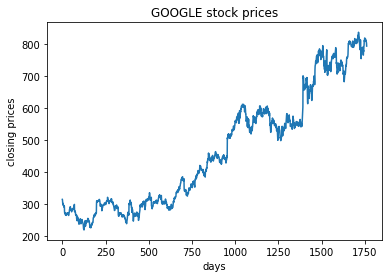

In [5]:
dataGOOGL=temp2[temp2.symbol=='GOOGL'].copy().values
closingGOOGL=dataGOOGL[:,3]
import matplotlib.pyplot as plt
plt.plot(closingGOOGL)
plt.xlabel('days')
plt.ylabel('closing prices')
plt.title('GOOGLE stock prices')
plt.show()


In [6]:
#normalize the data
import sklearn.preprocessing as preprocessing
minMaxScaler=preprocessing.MinMaxScaler()
temp2['close']=minMaxScaler.fit_transform(temp2.close.values.reshape(-1,1))
temp2['open']=minMaxScaler.fit_transform(temp2.open.values.reshape(-1,1))
temp2['high']=minMaxScaler.fit_transform(temp2.high.values.reshape(-1,1))
temp2['low']=minMaxScaler.fit_transform(temp2.low.values.reshape(-1,1))
temp2['volume']=minMaxScaler.fit_transform(temp2.volume.values.reshape(-1,1))

In [23]:
#This part is just for informing me which stocks have the whole 1762 data
# nameColumn=temp2['symbol'].values
# name, nameCount = np.unique(nameColumn,return_counts=True)
# for i in range(0,len(nameColumn)-1):
#   print(' %s has %i samples'%(name[i],nameCount[i]))

In [8]:
#We choose two stocks 
dataAAL=temp2[temp2.symbol=='AAL'].copy().values
print(dataAAL[0:10,:])
dataAAP=temp2[temp2.symbol=='AAP'].copy().values

[['2010-01-04' 'AAL' 0.002009123263206682 0.00201707536117994
  0.002040763685002362 0.0019573264634951547 0.011443465976706155]
 ['2010-01-05' 'AAL' 0.0019775332747914826 0.0023595975923237033
  0.0020730542496384748 0.0022262243482564694 0.02932844014157498]
 ['2010-01-06' 'AAL' 0.0022302531821130783 0.002220051498154022
  0.002260339524527932 0.002232477787436965 0.019307889759870196]
 ['2010-01-07' 'AAL' 0.0021481192122335593 0.002315196562360623
  0.0022926300891640454 0.0022637449833394436 0.016324676022639154]
 ['2010-01-08' 'AAL' 0.0022807971635773966 0.0022517665195562224
  0.002299088202091268 0.0022637449833394436 0.01484336412051788]
 ['2010-01-11' 'AAL' 0.0021923451960148385 0.002188336476751822
  0.0022215908469645964 0.0021386761997295297 0.012741213391506292]
 ['2010-01-12' 'AAL' 0.0021481192122335593 0.002213708493873582
  0.0022345070728190418 0.002088648686285564 0.009155307886968014]
 ['2010-01-13' 'AAL' 0.002186027198331799 0.002467428665091185
  0.0022732557503823

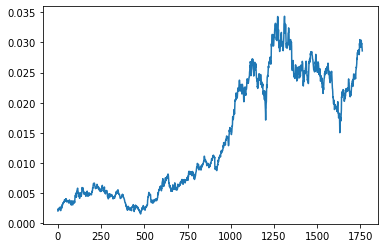

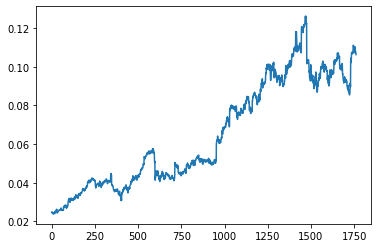

In [9]:
#The original stock prices
closingAAL=dataAAL[:,3]
#print(closingAAL[:10])
closingAAP=dataAAP[:,3]
import matplotlib.pyplot as plt
plt.plot(closingAAL)
plt.show()
plt.plot(closingAAP)
plt.show()

In [10]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [11]:
look_back = 1
trainX1, trainY1 = create_dataset(closingAAL, look_back) #This is the data processing code that is used in the training
trainX=trainX1.reshape(1760)
trainY=trainY1.reshape(1760)
indexX=np.ones(len(trainX))
indexY=np.ones(len(trainY))
combinedX=np.vstack((indexX, trainX)).T
combinedY=np.vstack((indexY,trainY)).T
for i in range(0,1759):
  combinedX[i,0]=i
  combinedY[i,0]=i

#print(combinedX[:10])
#print(combinedY[:10])
testX1, testY1 = create_dataset(closingAAP, look_back) #This is the data processing code used
testX=testX1.reshape(1760)
testY=testY1.reshape(1760)
testX=np.vstack((indexX, testX)).T
testY=np.vstack((indexY,testY)).T

In [12]:
#This is also not used in the training
combinedTrainX=np.vstack((indexX,indexX))
combinedTrainX=np.vstack((combinedTrainX,trainX)).T
combinedTrainY=np.vstack((indexX,indexY))
combinedTrainY=np.vstack((combinedTrainY,trainY)).T
for i in range(0,1759):
  combinedTrainX[i,0]=i
  combinedTrainY[i,0]=i
#print(combinedTrainX[:10,:],combinedTrainY[:10,:])
#combinedX = np.reshape(combinedX, (combinedX.shape[0], 1, combinedX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Masking
from keras.layers import LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [14]:
combinedTrainX.astype(np.float32)
combinedTrainY.astype(np.float32)
import tensorflow as tf
X=tf.convert_to_tensor(trainX1,dtype=tf.float32)
Y=tf.convert_to_tensor(trainY1,dtype=tf.float32)

In [15]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=5, batch_size=1, verbose=2)

Epoch 1/5
1760/1760 - 6s - loss: 4.1469e-05 - 6s/epoch - 3ms/step
Epoch 2/5
1760/1760 - 2s - loss: 2.9928e-07 - 2s/epoch - 1ms/step
Epoch 3/5
1760/1760 - 2s - loss: 3.8264e-07 - 2s/epoch - 1ms/step
Epoch 4/5
1760/1760 - 2s - loss: 5.0419e-07 - 2s/epoch - 1ms/step
Epoch 5/5
1760/1760 - 2s - loss: 4.6187e-07 - 2s/epoch - 1ms/step


In [16]:
dataFAST=temp2[temp2.symbol=='FAST'].copy().values
closingFAST=dataFAST[:,3]
trainXFAST, trainYFAST = create_dataset(closingFAST, look_back)
train_size = int(len(trainXFAST) * 0.67)
test_size = len(trainXFAST) - train_size
trainXFAST_trimmed, testXFAST = trainXFAST[0:train_size], trainXFAST[train_size:len(trainXFAST)]
trainYFAST_trimmed=trainYFAST[0:train_size]
testYFAST=trainYFAST[train_size:len(trainXFAST)]
print(len(trainXFAST_trimmed), len(testXFAST))
trainXFAST_trimmed=tf.convert_to_tensor(trainXFAST_trimmed,dtype=tf.float32)
trainYFAST_trimmed=tf.convert_to_tensor(trainYFAST_trimmed,dtype=tf.float32)


1179 581


In [17]:
model.fit(trainXFAST_trimmed, trainYFAST_trimmed, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
1179/1179 - 2s - loss: 5.1173e-07 - 2s/epoch - 1ms/step
Epoch 2/10
1179/1179 - 2s - loss: 4.8944e-07 - 2s/epoch - 1ms/step
Epoch 3/10
1179/1179 - 2s - loss: 4.7332e-07 - 2s/epoch - 1ms/step
Epoch 4/10
1179/1179 - 2s - loss: 4.8272e-07 - 2s/epoch - 1ms/step
Epoch 5/10
1179/1179 - 2s - loss: 4.8787e-07 - 2s/epoch - 1ms/step
Epoch 6/10
1179/1179 - 2s - loss: 4.6381e-07 - 2s/epoch - 2ms/step
Epoch 7/10
1179/1179 - 3s - loss: 4.7234e-07 - 3s/epoch - 2ms/step
Epoch 8/10
1179/1179 - 3s - loss: 5.0524e-07 - 3s/epoch - 3ms/step
Epoch 9/10
1179/1179 - 3s - loss: 4.4415e-07 - 3s/epoch - 2ms/step
Epoch 10/10
1179/1179 - 2s - loss: 4.6708e-07 - 2s/epoch - 1ms/step


In [18]:
testXFAST=tf.convert_to_tensor(testXFAST,dtype=tf.float32)
FAST_pred=model.predict(testXFAST)
model.evaluate(FAST_pred, testYFAST)

19/19 [==============================] - 1s 2ms/step - loss: 2.2021e-07


2.2021438894626044e-07

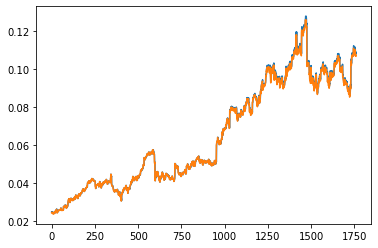

55/55 [==============================] - 1s 2ms/step - loss: 2.9416e-06
[[0.02474982]
 [0.0245997 ]
 [0.02481863]
 ...
 [0.10857704]
 [0.10920033]
 [0.10826873]] [0.02445228 0.02467429 0.02466794 ... 0.10798965 0.10708894 0.10700014]


In [19]:
testX2=tf.convert_to_tensor(testX1,dtype=tf.float32)
testPredict = model.predict(testX2)
plt.plot(testPredict)
plt.plot(testY1)
plt.show()
model.evaluate(testPredict,testY1)
print(testPredict,testY1)

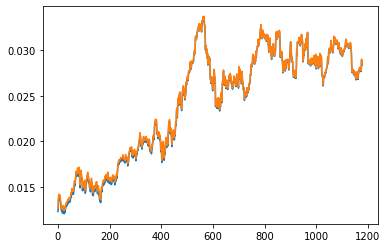

1179 1179 581
37/37 [==============================] - 0s 3ms/step - loss: 1.4299e-07
The root mean squared error is 0.00019086306331575581.


In [22]:
dataGOOGL=temp2[temp2.symbol=='GOOGL'].copy().values
closingGOOGL=dataGOOGL[:,3]
X_GOOGL, Y_GOOGL = create_dataset(closingFAST, look_back)
trim_size = int(len(X_GOOGL) * 0.67)
trainX_GOOGL, testX_GOOGL = X_GOOGL[0:train_size], X_GOOGL[train_size:len(X_GOOGL)]
trainY_GOOGL, testY_GOOGL = Y_GOOGL[0:train_size], Y_GOOGL[train_size:len(Y_GOOGL)]
trainX_GOOGL=tf.convert_to_tensor(trainX_GOOGL,dtype=tf.float32)
testX_GOOGL=tf.convert_to_tensor(testX_GOOGL,dtype=tf.float32)

pred_GOOGL=model.predict(trainX_GOOGL)
plt.plot(trainX_GOOGL)
plt.plot(pred_GOOGL)
plt.show()
print(len(pred_GOOGL),len(trainX_GOOGL),len(testX_GOOGL))
model.evaluate(pred_GOOGL, trainX_GOOGL)
return_rmse(trainX_GOOGL,pred_GOOGL)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_arima = temp2['close']
test_arima = temp2['close']
# train_arima=dataGOOGL
# test_arima=dataGOOGL

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])



# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [31]:
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y.values[1:4], predictions))
print('RMSE: '+str(rmse))

MSE: 0.0007186370247764672
MAE: 0.020435492326833223
RMSE: 0.02680740615532333


ValueError: ignored

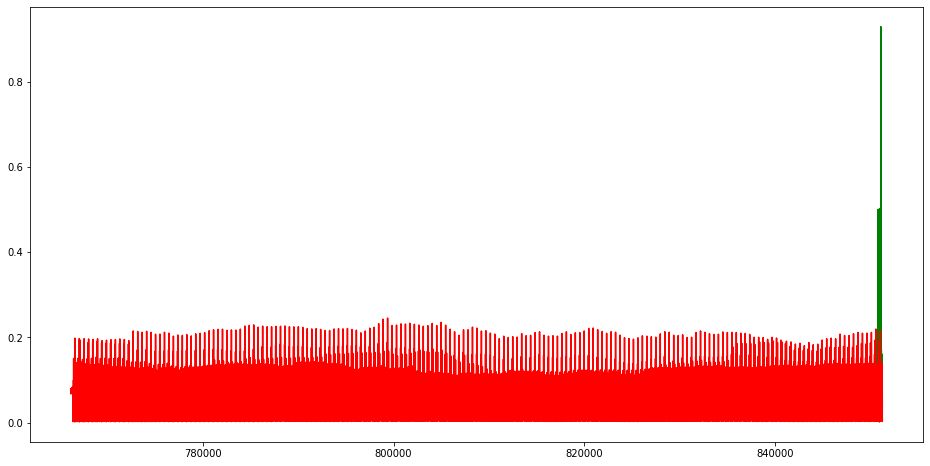

In [35]:
plt.figure(figsize=(16,8))
train_data, test_data = temp2[0:int(len(temp2)*0.9)], temp2[int(len(temp2)*0.9):]
plt.plot(temp2.index[-600:], temp2['close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y.values[0:85127], color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Goldman Sachs Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Goldman Sachs Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()

In [21]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Dataframe Shape:  (1259, 6)
              open     high       low   close   volume Name
date                                                       
2013-02-08  102.34  103.330  102.0400  102.66  1937721  MMM
2013-02-11  102.39  102.880  102.0401  102.62  1715444  MMM
2013-02-12  102.66  103.590  102.6300  103.46  1927930  MMM
2013-02-13  103.03  103.395  102.5800  102.86  1699804  MMM
2013-02-14  102.43  103.140  102.2200  102.78  2217419  MMM
...            ...      ...       ...     ...      ...  ...
2018-02-01  247.44  250.090  246.1795  247.94  2665501  MMM
2018-02-02  246.43  248.750  244.8800  245.17  3925658  MMM
2018-02-05  243.50  244.400  226.0100  231.44  6590490  MMM
2018-02-06  227.51  234.570  226.8100  233.63  5108142  MMM
2018-02-07  233.19  237.520  232.8210  233.19  2885570  MMM

[1259 rows x 6 columns]
MMM


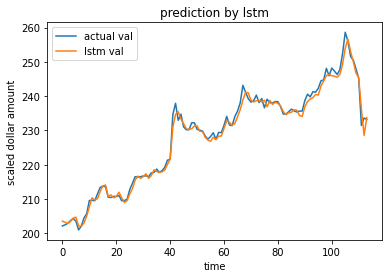

396.5647993637689
19.913934803643624
OUTPUT=[['MMM', 396.5647993637689, 19.913934803643624]]
Dataframe Shape:  (1259, 6)
             open     high    low  close    volume Name
date                                                   
2013-02-08  34.39  34.6600  34.29  34.41  10237828  ABT
2013-02-11  34.42  34.4900  34.24  34.26   7928236  ABT
2013-02-12  34.27  34.5000  34.21  34.30   7070536  ABT
2013-02-13  34.29  34.5800  34.25  34.46   6688100  ABT
2013-02-14  34.28  34.7500  34.28  34.70   8561425  ABT
...           ...      ...    ...    ...       ...  ...
2018-02-01  61.75  62.5400  61.66  62.18   8101584  ABT
2018-02-02  62.20  62.4200  61.64  61.69  12346542  ABT
2018-02-05  61.60  61.8700  58.55  58.73  11548229  ABT
2018-02-06  57.92  59.2606  57.33  58.86  15214679  ABT
2018-02-07  58.60  59.8500  58.50  58.67   6872663  ABT

[1259 rows x 6 columns]


In [ ]:
#PANDAS
import pandas

#NUMPY
import numpy as np

#MATPLOTLIB
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mandates

#SKLEARN
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

#KERAS
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
import keras.backend as K
import datetime

from google.colab import drive
drive.mount('/content/drive/')

StockChoices=['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET',
		'AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE',
		'AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP',
		'AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV',
		'ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC',
		'AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK',
		'BAX','BBT','BDX','BRK.B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX',
		'BHF','BMY','AVGO','BF.B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE',
		'KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW',
		'CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG',
		'CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP',
		'ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI',
		'DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH',
		'DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN',
		'EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR',
		'ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST',
		'FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV',
		'FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD',
		'GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC',
		'HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','HII',
		'IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU',
		'ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY',
		'KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK',
		'LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM',
		'MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU',
		'MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ',
		'NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI',
		'NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE',
		'ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE',
		'PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR',
		'PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O',
		'RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC',
		'SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV',
		'SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR',
		'TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV',
		'TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UAA','UA','UNP','UAL','UNH','UPS','URI',
		'UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO',
		'VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB',
		'WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']
df=[]
OUTPUT=[]
for stockName in StockChoices:
    with open('/content/drive/MyDrive/S&P/individual_stocks_5yr/{}_data.csv'.format(stockName),'r') as f:
        data=(pandas.read_csv(f, na_values=['null'], index_col='date', parse_dates=True, infer_datetime_format=True))
        print("Dataframe Shape: ", data.shape)
        print(data)
        output_var = pandas.DataFrame(data['close'])
        features = ['open', 'high', 'low', 'volume']
        scaler = MinMaxScaler()
        feature_transform = scaler.fit_transform(data[features])
        feature_transform= pandas.DataFrame(columns=features, data=feature_transform, index=data.index)
        timesplit = TimeSeriesSplit(n_splits=10)
        for train_index, test_index in timesplit.split(feature_transform):
            X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
            y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        train_X = np.array(X_train)
        test_X = np.array(X_test)
        X_train = train_X.reshape(X_train.shape[0], 1, X_train.shape[1])
        X_test = test_X.reshape(X_test.shape[0], 1, X_test.shape[1])
        lstm = Sequential()
        lstm.add(LSTM(32, input_shape=(1, train_X.shape[1]), activation='relu', return_sequences=False))
        lstm.add(Dense(1))
        lstm.compile(loss='mean_squared_error', optimizer='adam')
    #   plot_model(lstm, show_shapes=True, show_layer_names=True)
        history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0, shuffle=False)
        y_pred= lstm.predict(X_test)
        print(stockName)
        plt.plot(y_test, label='actual val')
        plt.plot(y_pred, label='lstm val')
        plt.title("prediction by lstm")
        plt.xlabel('time')
        plt.ylabel('scaled dollar amount')
        plt.legend()
        plt.show()
        MSE = np.square(np.subtract(y_test,y_pred)).mean()
        RMSE = np.sqrt(((y_pred - y_test) ** 2).mean())
        print(MSE)
        print(RMSE)
        OUTPUT.append([stockName,MSE,RMSE])
        print("OUTPUT={}".format(OUTPUT))